In [1]:
import sys
sys.path.append('..')

In [2]:
import tensorflow as tf

import configs.demo as config
from models import unet
from wrap import AleatoricWrapper, EpistemicWrapper
from utils import get_datasets, visualize_depth_map

from run_utils import setup
path, checkpoints_path, vis_path, plots_path, logs_path = setup('demo')

In [3]:
ds_train, ds_test, ds_ood = get_datasets()

### Base

In [10]:
user_model = unet(compile=True)

In [ ]:
# x, y = iter(ds_train).get_next()
# y_hat = user_model(x)
visualize_depth_map(user_model, ds_train, vis_path, f'base_random_train', is_show=True, plot_uncertainty=False)

##### Train

In [6]:
# model_name = 'demo-base'
# history = user_model.fit(ds_train, epochs=config.EP,
#     validation_data=ds_test,
# )

##### Load trained model

In [11]:
from utils import load_model, select_best_checkpoint

path, model_name = select_best_checkpoint(config.BASE_PATH)
trained_user_model = load_model(path, model_name, ds_train)

2022-08-30 04:24:30.090847: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open /data/capsa/depth/results/base/20220829-135832/checkpoints/0.003vloss_17204iter.tf: FAILED_PRECONDITION: /data/capsa/depth/results/base/20220829-135832/checkpoints/0.003vloss_17204iter.tf; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


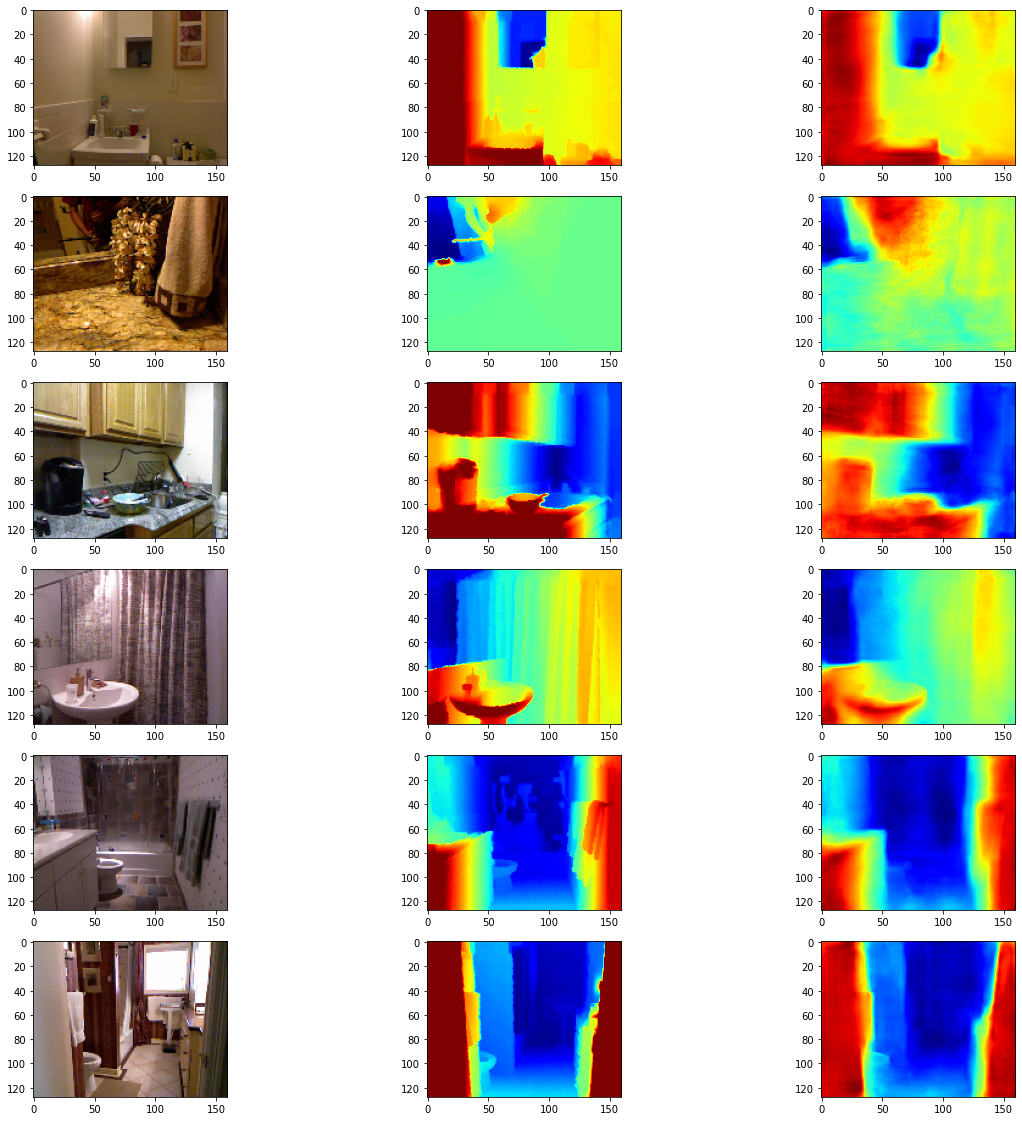

In [12]:
visualize_depth_map(trained_user_model, ds_train, vis_path, f'train', is_show=True, plot_uncertainty=False)
# visualize_depth_map(trained_user_model, ds_test, vis_path, f'test', is_show=True, plot_uncertainty=False)
# visualize_depth_map(trained_user_model, ds_ood, vis_path, 'ood', is_show=True, plot_uncertainty=False)

### Aleatoric

##### Train

In [ ]:
user_model = unet()
aleatoric_model = AleatoricWrapper(user_model)

model_name = 'demo-aleatoric'
history = aleatoric_model.fit(ds_train, epochs=config.EP,
    validation_data=ds_test,
)

In [ ]:
visualize_depth_map(aleatoric_model, ds_train, vis_path, 'train', is_show=True)
# visualize_depth_map(aleatoric_model, ds_test, vis_path, 'test', is_show=True)
# visualize_depth_map(aleatoric_model, ds_ood, vis_path, 'ood', is_show=True)

##### Load trained model

In [9]:
path, model_name = select_best_checkpoint(config.ALEATORIC_PATH)
trained_aleatoric = load_model(path, model_name, ds_train)

Successfully loaded weights from /data/capsa/depth/results/mve/20220827-211807/checkpoints/-2.262vloss_51300iter.tf.


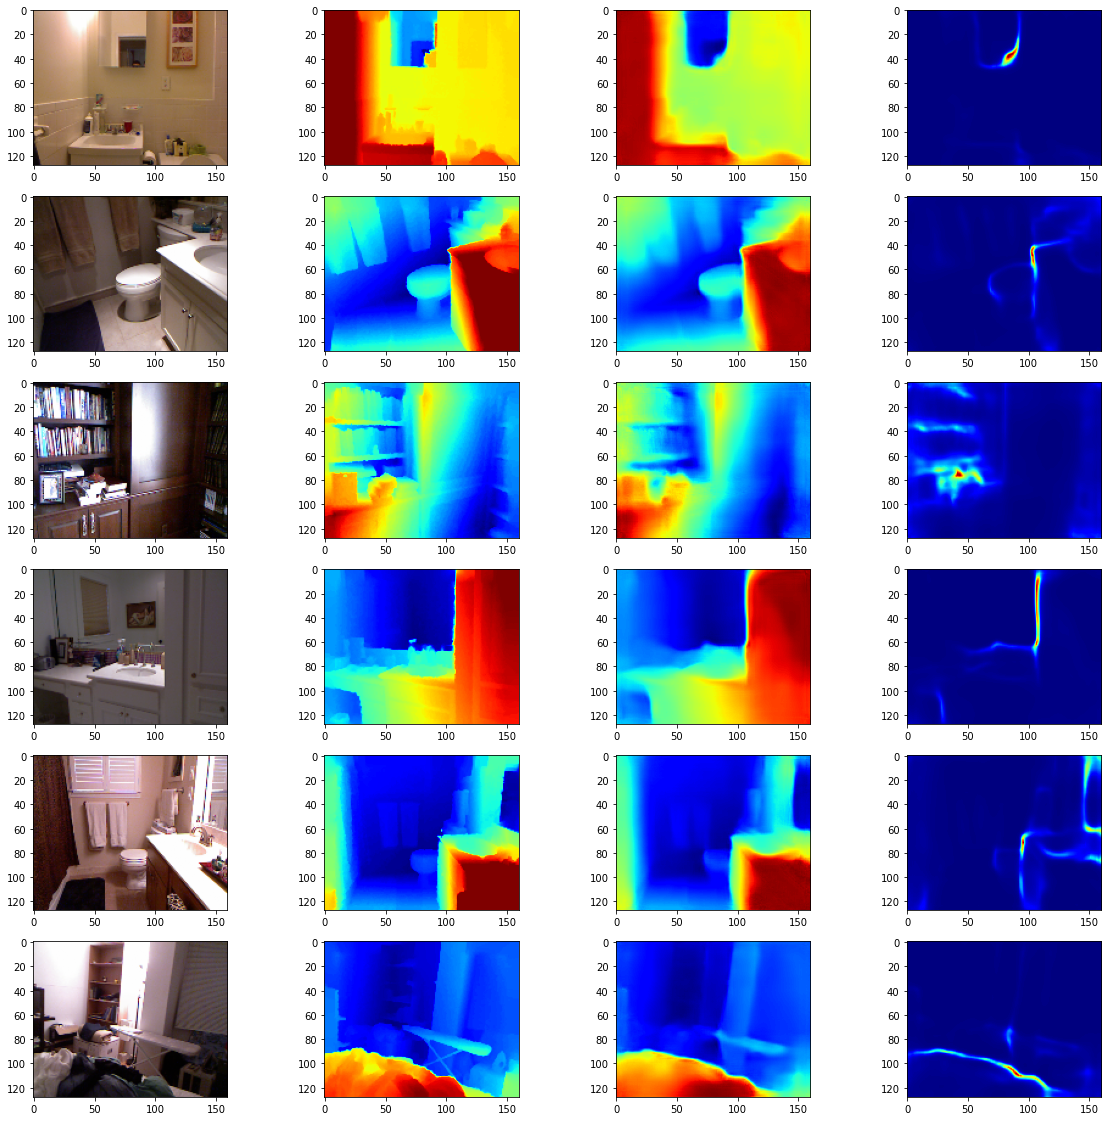

In [11]:
visualize_depth_map(trained_aleatoric, ds_train, vis_path, f'trained_train', is_show=True)
# visualize_depth_map(trained_aleatoric, ds_test, vis_path, f'trained_test', is_show=True)
# visualize_depth_map(trained_aleatoric, ds_ood, vis_path, f'trained_ood', is_show=True)

### Epistemic

##### Train

In [ ]:
user_model = unet()
epistemic_model = EpistemicWrapper(user_model)

model_name = 'demo-epistemic'
history = epistemic_model.fit(ds_train, epochs=config.EP,
    validation_data=ds_test,
)

In [ ]:
visualize_depth_map(epistemic_model, ds_train, vis_path, 'train', is_show=True)
# visualize_depth_map(epistemic_model, ds_test, vis_path, 'test', is_show=True)
# visualize_depth_map(epistemic_model, ds_ood, vis_path, 'ood', is_show=True)

##### Load trained model

In [8]:
path, model_name = select_best_checkpoint(config.EPISTEMIC_PATH)
trained_epistemic = load_model(path, model_name, ds_train)

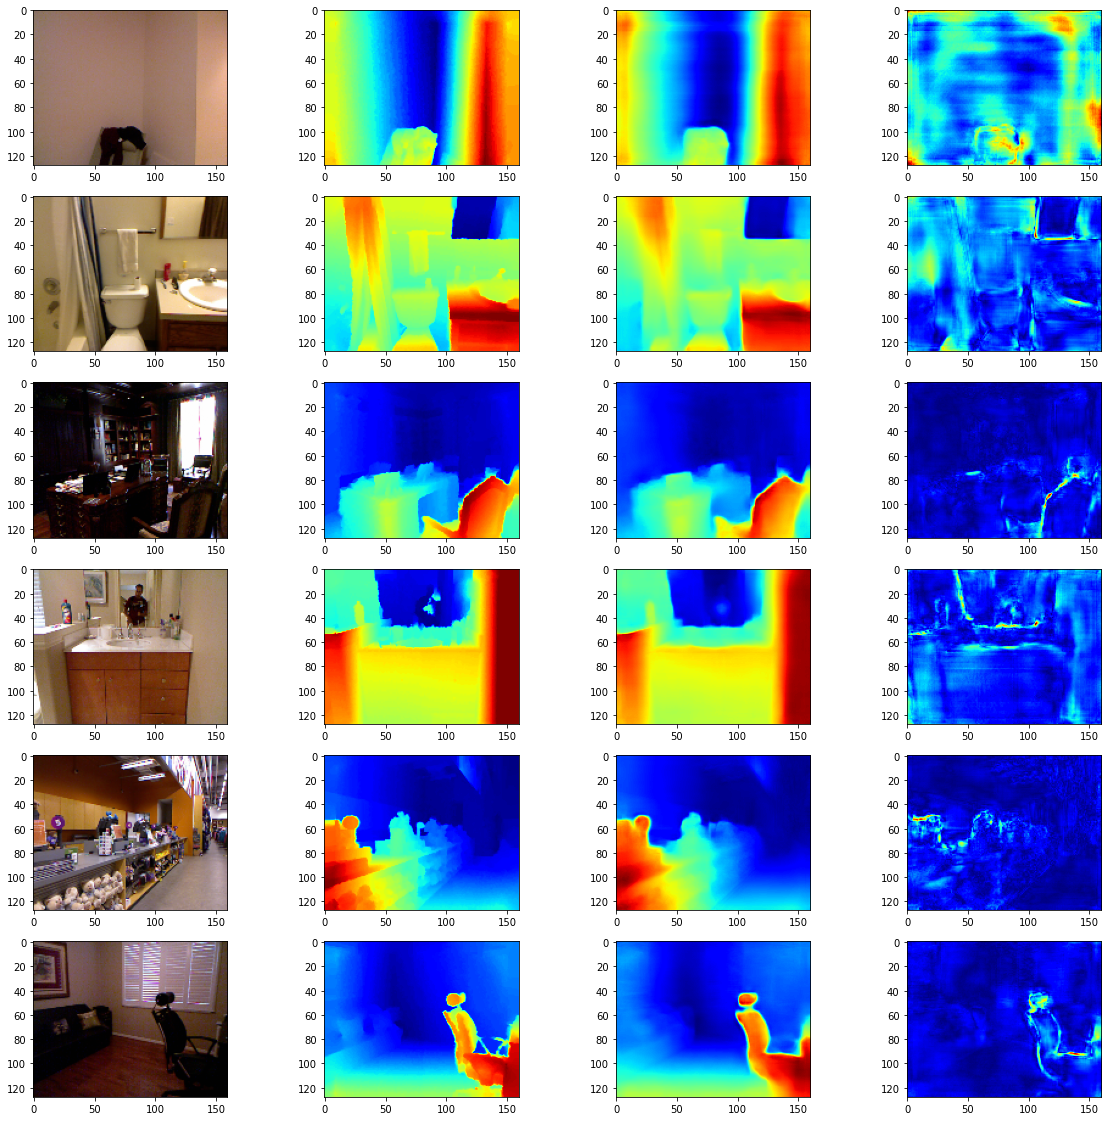

In [9]:
visualize_depth_map(trained_epistemic, ds_train, vis_path, f'trained_train', is_show=True)
# visualize_depth_map(trained_epistemic, ds_test, vis_path, f'trained_test', is_show=True)
# visualize_depth_map(trained_epistemic, ds_ood, vis_path, f'trained_ood', is_show=True)